<a href="https://colab.research.google.com/github/JhenyC/Final_proyect_SIST_G5/blob/main/final_proyect_sistemas_Inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("hola")
print("probando respositorio")

hola
probando respositorio


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [63]:
import pandas as pd
df = pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

<Axes: >

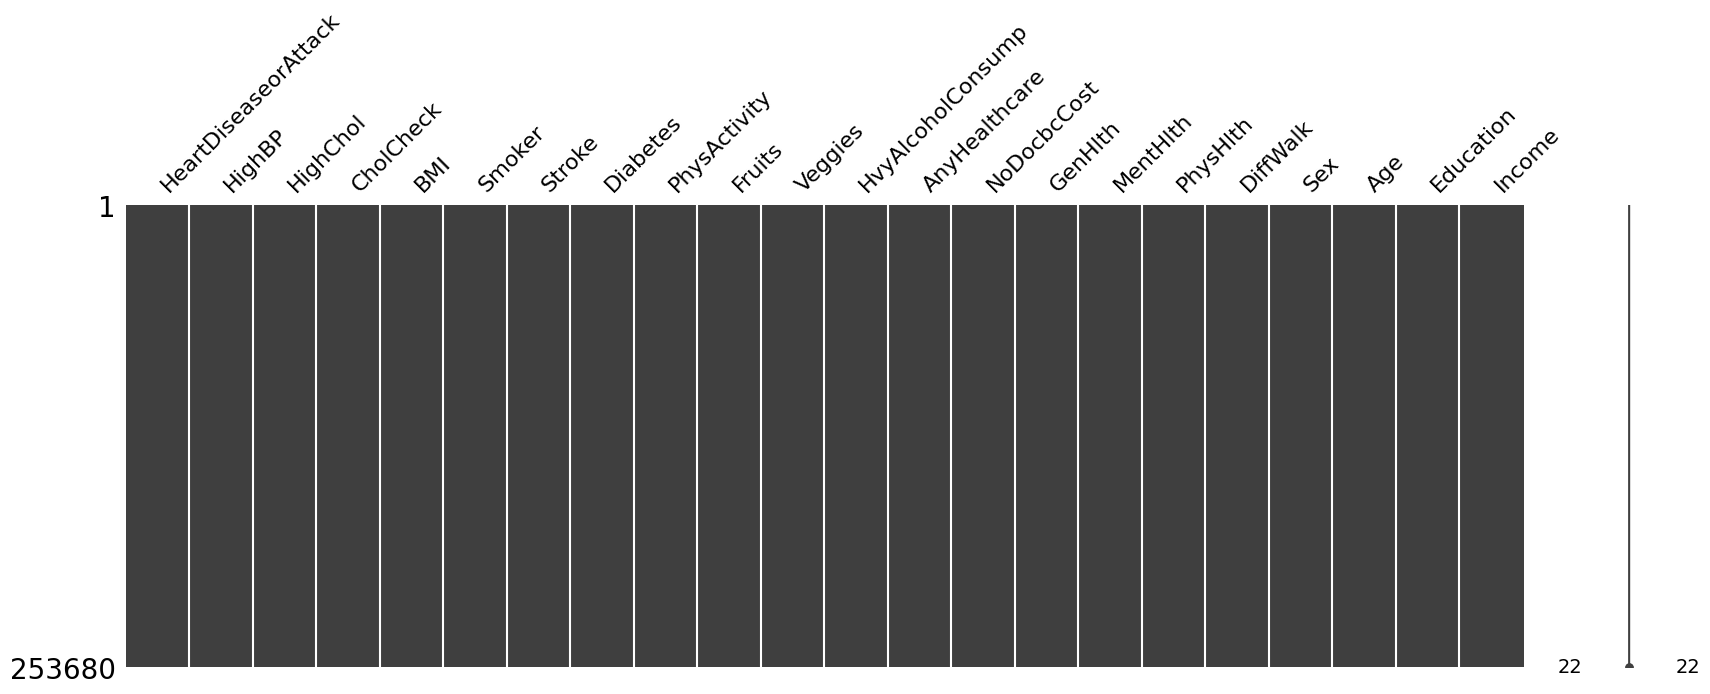

In [64]:
import missingno as msno

msno.matrix(df, figsize = (20, 6))

In [65]:
#tamaño de dataset 
print(df.shape)
#cantidad de valores nulos en cada columna de datframe 
df.isnull().sum()

(253680, 22)


HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [66]:
df.head(8)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0


In [67]:
df['Age'] = df['Age']*4


In [68]:
df['Age'].max()


52.0

In [69]:
df['Age'].min()

4.0

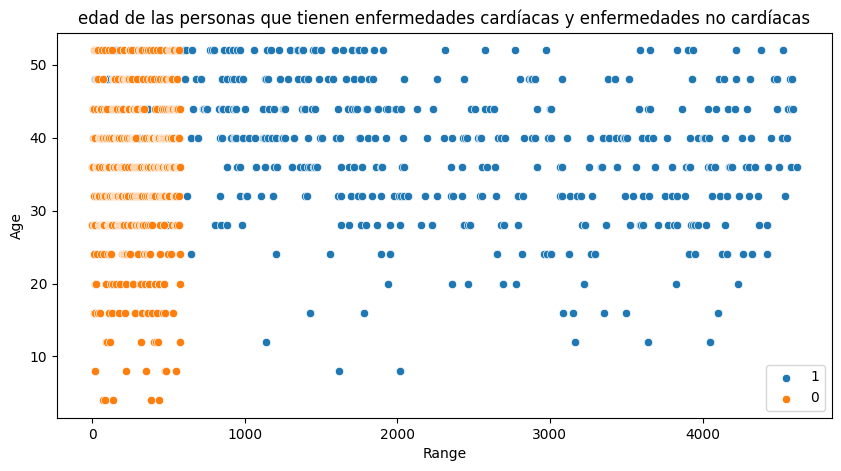

In [70]:
plt.figure(figsize=(10,5))

data0=df[df['HeartDiseaseorAttack']==0.0]

data1=df[df['HeartDiseaseorAttack']==1.0]

sns.scatterplot(data1['Age'].head(500),label="1")
sns.scatterplot(data0['Age'].head(500),label="0")

plt.title("edad de las personas que tienen enfermedades cardíacas y enfermedades no cardíacas")

plt.ylabel("Age")

plt.xlabel("Range")
plt.show()

In [84]:
df.describe()
df.groupby('HeartDiseaseorAttack').size()

HeartDiseaseorAttack
0.0    229787
1.0     23893
dtype: int64

<ipython-input-13-290d848b8dc7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df.HeartDiseaseorAttack== 0][col], hist=False, axlabel= False, kde_kws={'linestyle':'-', 'color':'black', 'label':"No Heart disease"})
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-13-290d848b8dc7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displo

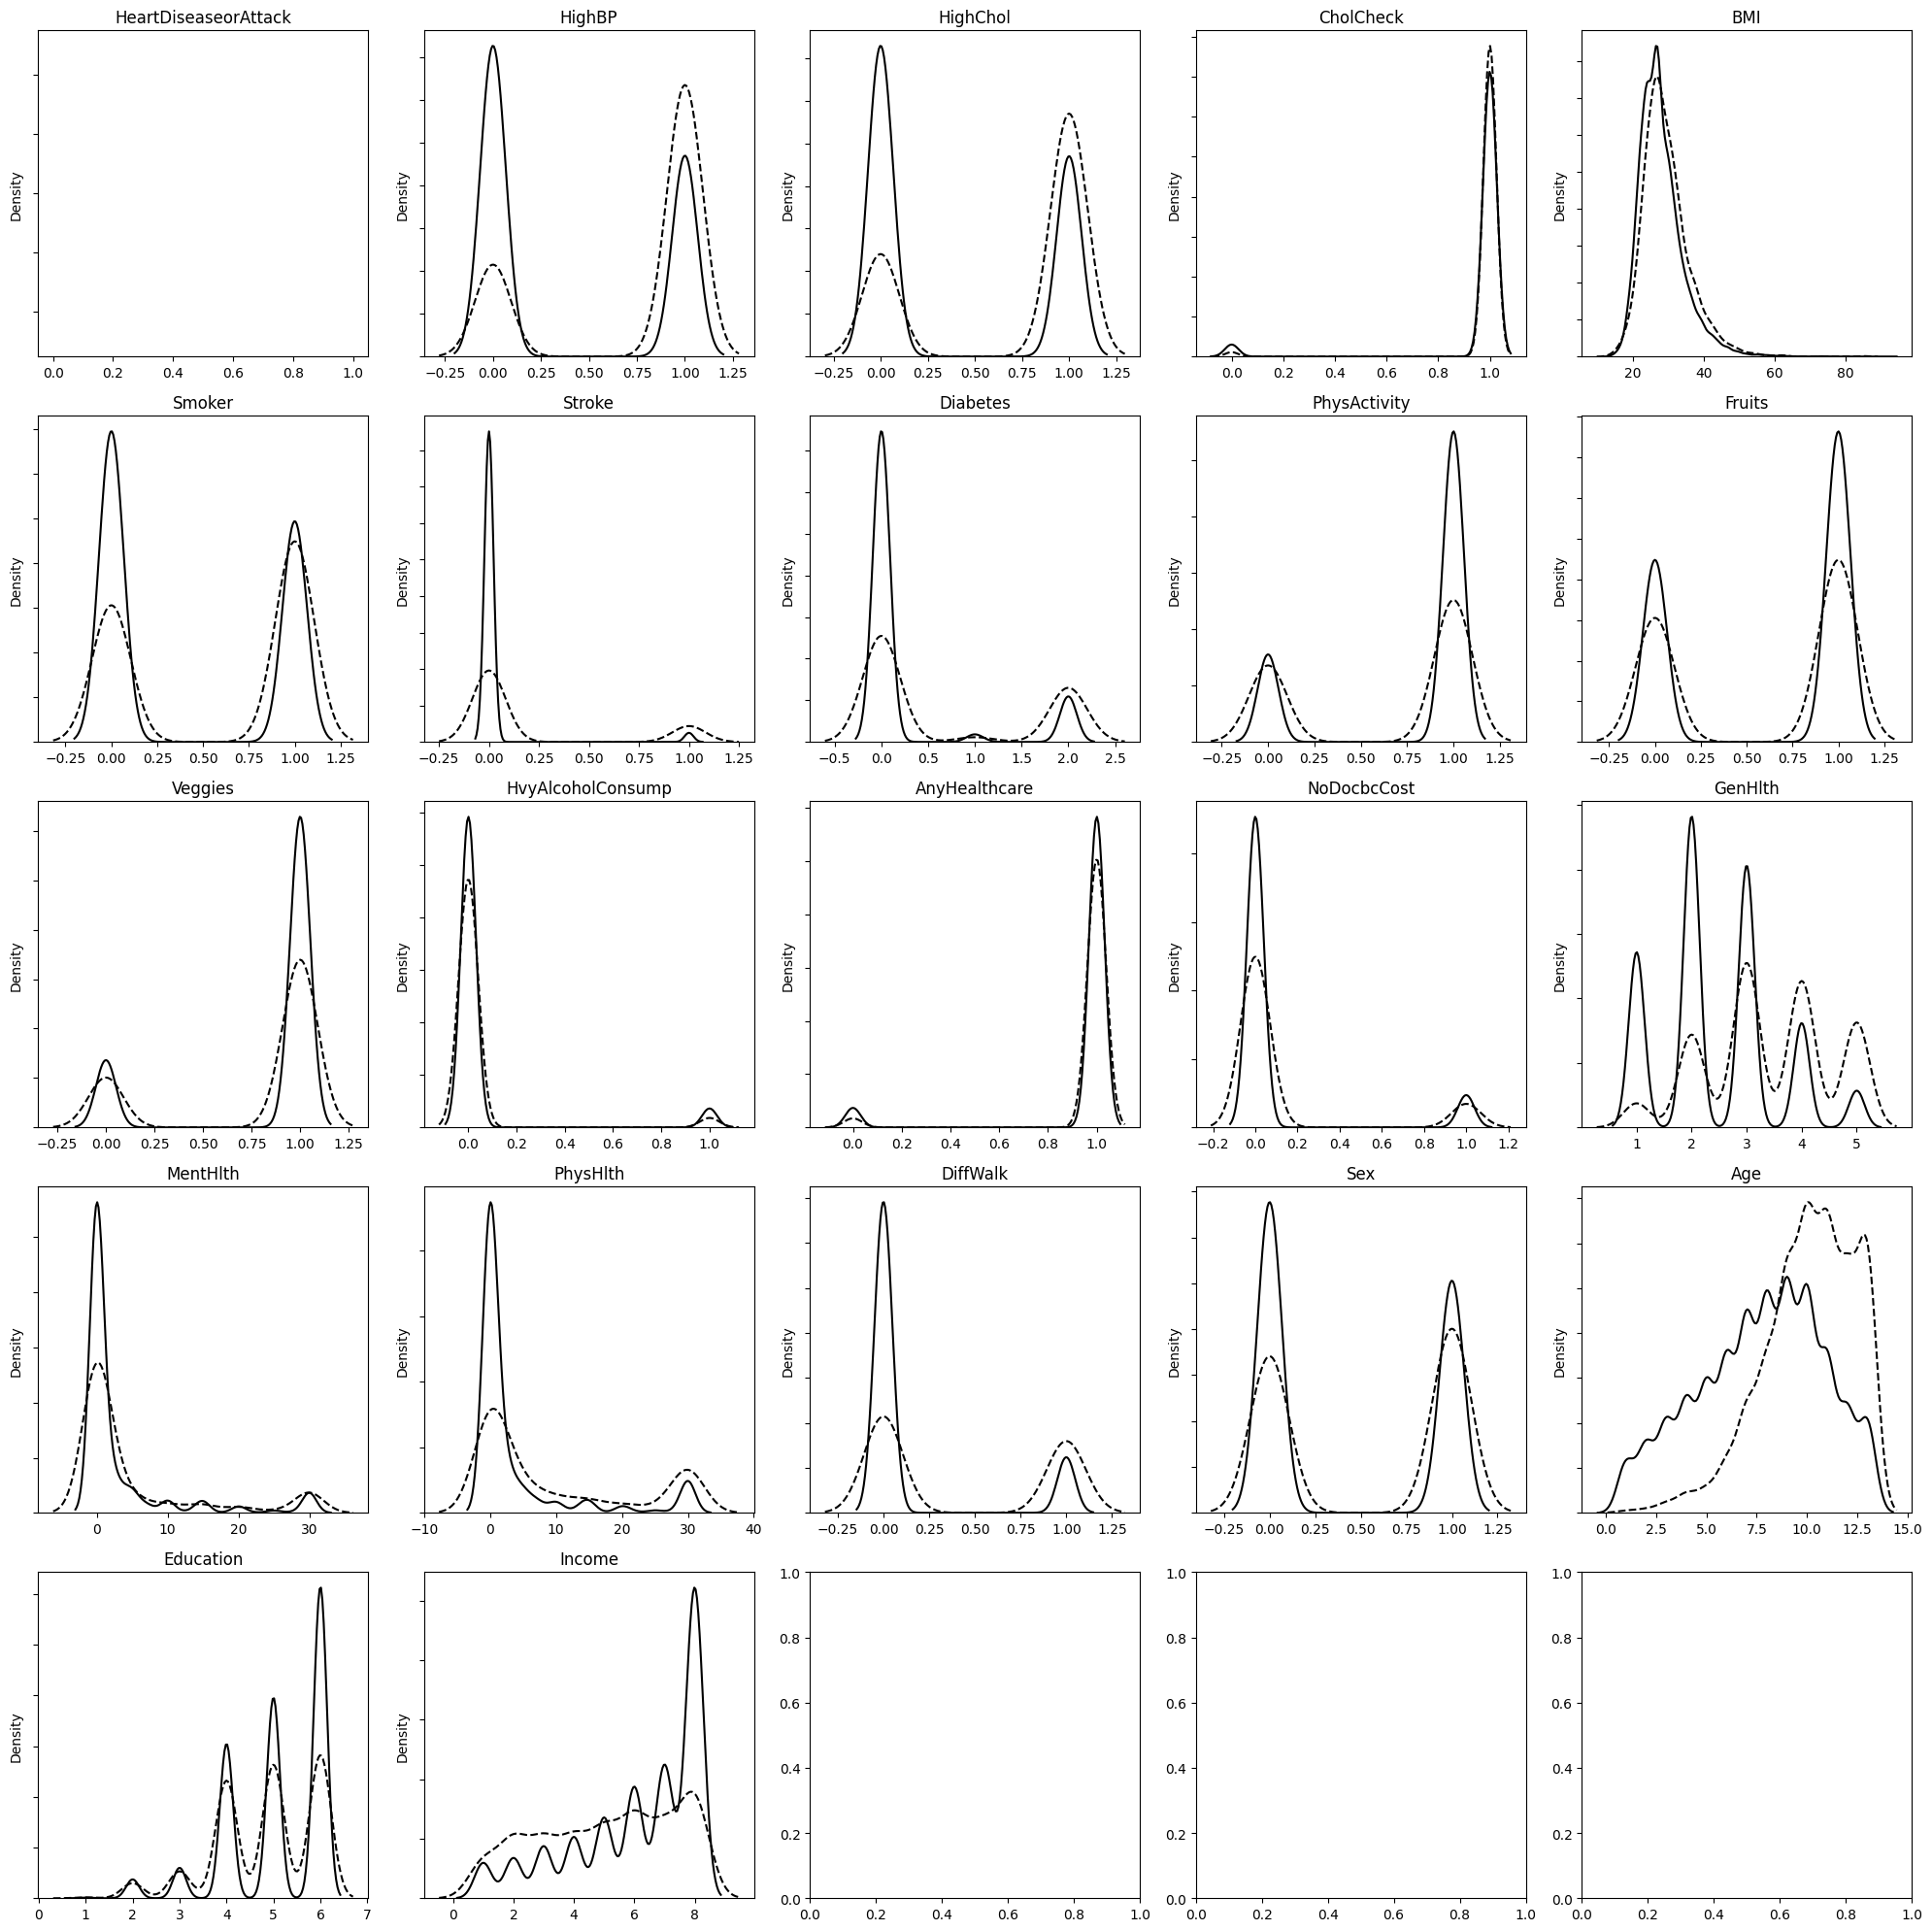

In [ ]:
plt.subplots(5,5,figsize=(20,20))

for idx, col in enumerate(df.columns):
    ax = plt.subplot(5,5,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.HeartDiseaseorAttack== 0][col], hist=False, axlabel= False, kde_kws={'linestyle':'-', 'color':'black', 'label':"No Heart disease"})
    sns.distplot(df.loc[df.HeartDiseaseorAttack == 1][col], hist=False, axlabel= False, kde_kws={'linestyle':'--', 'color':'black', 'label':"Heart Desease"})
    ax.set_title(col)
plt.tight_layout()
plt.show()


In [113]:
x = df[['HighBP', 'HighChol', 'BMI', 'Smoker', 'Diabetes', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Sex']]
y = df['HeartDiseaseorAttack']

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
y_train.value_counts()

0.0    160893
1.0     16683
Name: HeartDiseaseorAttack, dtype: int64

In [118]:
from imblearn.combine import SMOTEENN
#clases están más equilibradas después del muestreo
sampler = SMOTEENN()
x_train, y_train = sampler.fit_resample(x_train, y_train)
y_train.value_counts()


1.0    128152
0.0    127288
Name: HeartDiseaseorAttack, dtype: int64

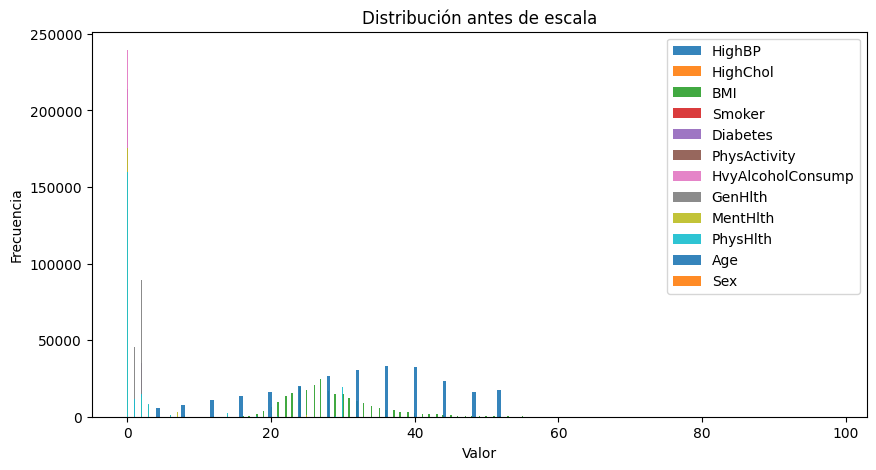

In [119]:

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 5))

# Crear un histograma para cada columna
for column in x.columns:
    plt.hist(x[column], bins='auto', alpha=0.9, label=column)

# Configurar el título y las etiquetas de los ejes
plt.title("Distribución antes de escala")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

(253680, 22)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


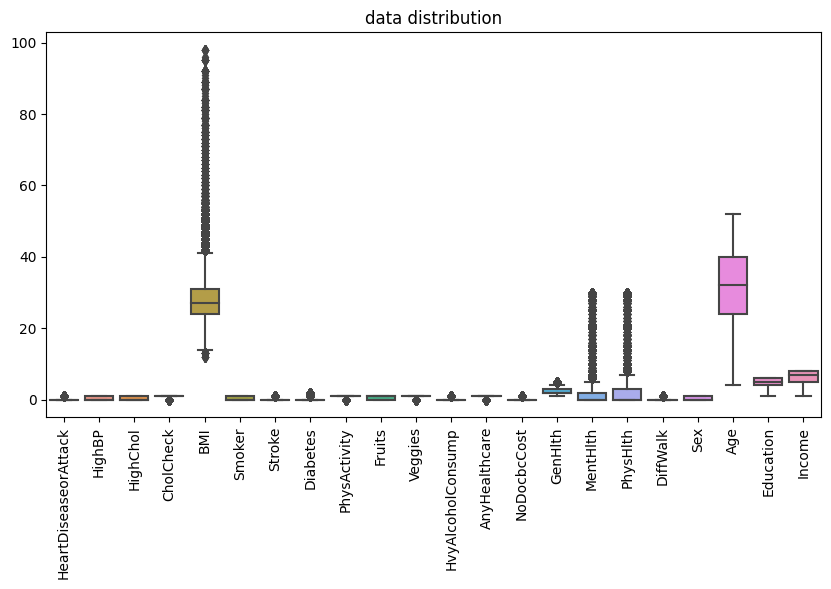

In [120]:
plt.figure(figsize=(10,5))
sns.boxplot(df)
print(df.shape)
l=list(np.arange(22))
print(l)
plt.title("data distribution")
plt.xticks(l, list(df.columns),
       rotation=90)
plt.show()

In [87]:
#ESCALAMIENTO

scaler=StandardScaler()

new_data=scaler.fit_transform(x_test)

x_test=pd.DataFrame(new_data)
                    
                    
new_data=scaler.fit_transform(x_train)

x_train=pd.DataFrame(new_data)        

In [121]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 0.97401181,  1.02051049, -0.40962433, ..., -0.60881227,
         0.47217069,  1.0940105 ],
       [-1.11323027,  1.02051049,  0.48015715, ..., -0.32210742,
        -0.5157304 ,  1.0940105 ],
       [-1.11323027, -1.07843996, -0.70621816, ..., -0.60881227,
        -0.5157304 , -1.02368112],
       ...,
       [ 0.75990806,  1.02051049,  0.18356332, ..., -0.60881227,
         0.14287033,  0.87678332],
       [-0.63608516,  1.02051049,  0.33186024, ..., -0.58696529,
         0.14287033,  0.6099046 ],
       [ 0.60321185,  0.64763053, -0.82817003, ...,  1.38114395,
         0.47217069, -1.02368112]])

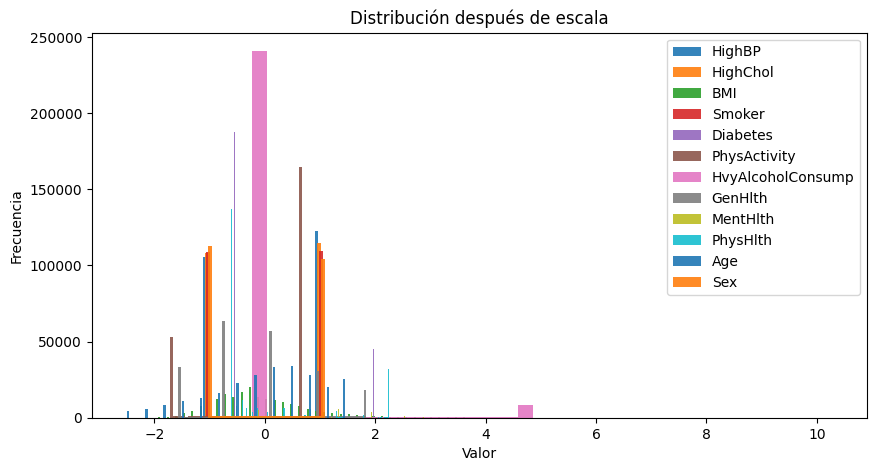

In [123]:
import pandas as pd

# Convertir x_train de Numpy array a DataFrame
x_train = pd.DataFrame(x_train, columns=x.columns)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 5))

# Crear un histograma para cada columna
for column in x_train.columns:
    plt.hist(x_train[column], bins='auto', alpha=0.9, label=column)

# Configurar el título y las etiquetas de los ejes
plt.title("Distribución después de escala")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


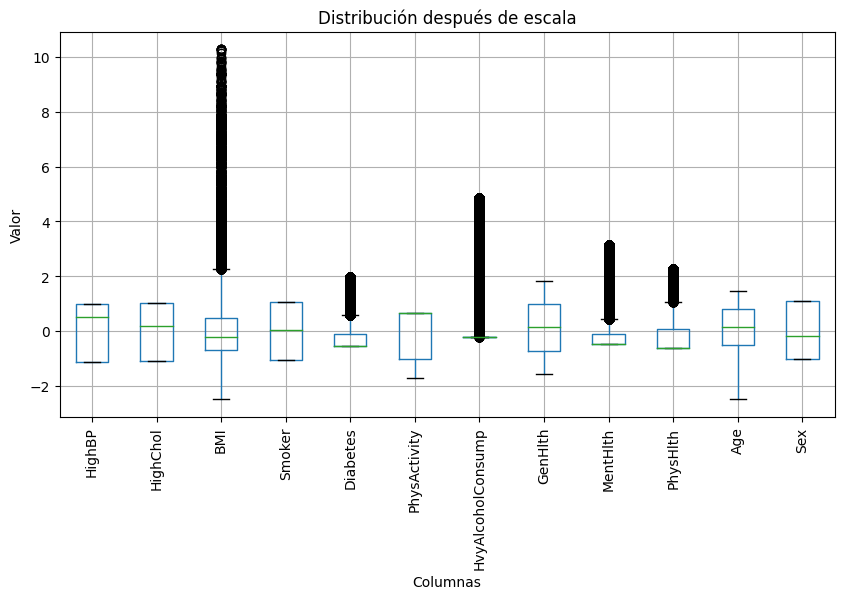

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir x_train de Numpy array a DataFrame
x_train = pd.DataFrame(x_train, columns=x.columns)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 5))

# Generar el diagrama de cajas
x_train.boxplot()

# Configurar el título y las etiquetas de los ejes
plt.title("Distribución después de escala")
plt.xlabel("Columnas")
plt.ylabel("Valor")

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
#MODELOS A IMPLEMENTAR
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'NB':GaussianNB(),
    'XGC':XGBClassifier(),
    'RF':RandomForestClassifier()
    
}

Using LR:
Training Accuracy: 0.8729564672721578
Testing Accuracy: 0.707834016608851


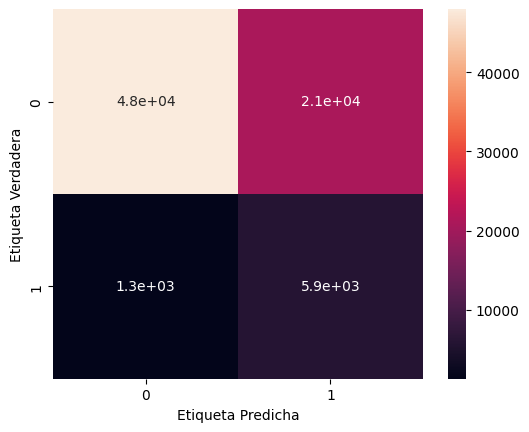

Recall: 0.8187239944521498
Precision: 0.2200067086578957
F1-score: 0.3468170735289798
Fbeta-score: 0.25769640456109105
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.70      0.81     68894
         1.0       0.22      0.82      0.35      7210

    accuracy                           0.71     76104
   macro avg       0.60      0.76      0.58     76104
weighted avg       0.90      0.71      0.77     76104

---------------------------------
Using KNN:
Training Accuracy: 0.9733714375195741
Testing Accuracy: 0.777948596657206


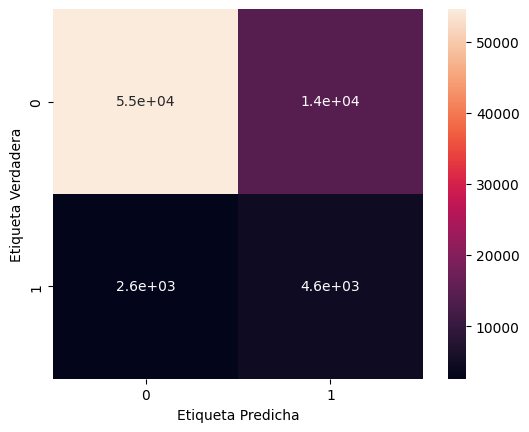

Recall: 0.639251040221914
Precision: 0.24377214788173693
F1-score: 0.35295018570279896
Fbeta-score: 0.2781935826553031
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.79      0.87     68894
         1.0       0.24      0.64      0.35      7210

    accuracy                           0.78     76104
   macro avg       0.60      0.72      0.61     76104
weighted avg       0.89      0.78      0.82     76104

---------------------------------
Using DT:
Training Accuracy: 1.0
Testing Accuracy: 0.7977767265846736


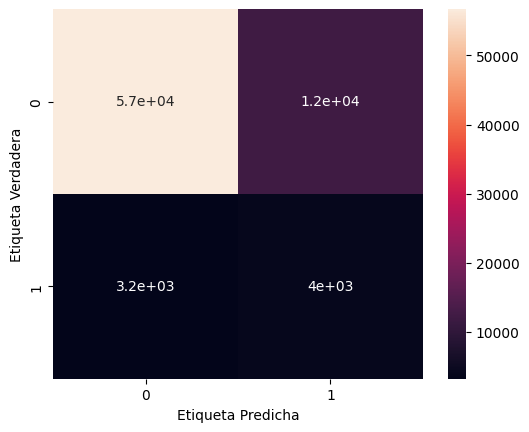

Recall: 0.5552011095700417
Precision: 0.24731249227727667
F1-score: 0.3421952470507779
Fbeta-score: 0.27816382688940156
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88     68894
         1.0       0.25      0.56      0.34      7210

    accuracy                           0.80     76104
   macro avg       0.60      0.69      0.61     76104
weighted avg       0.88      0.80      0.83     76104

---------------------------------
Using NB:
Training Accuracy: 0.8325555903538991
Testing Accuracy: 0.7192263218753285


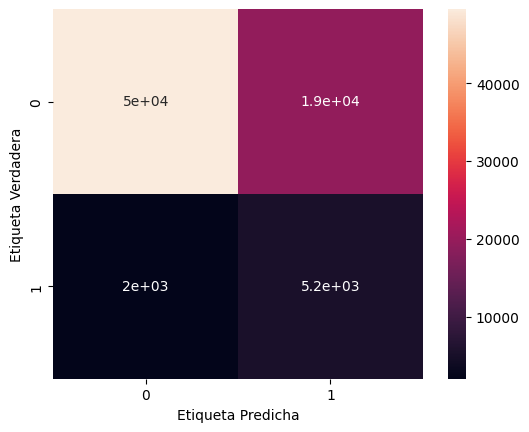

Recall: 0.7206657420249654
Precision: 0.21164969450101834
F1-score: 0.32720403022670025
Fbeta-score: 0.24646617967934734
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.72      0.82     68894
         1.0       0.21      0.72      0.33      7210

    accuracy                           0.72     76104
   macro avg       0.59      0.72      0.57     76104
weighted avg       0.89      0.72      0.78     76104

---------------------------------
Using XGC:
Training Accuracy: 0.964097243971187
Testing Accuracy: 0.8363160937664249


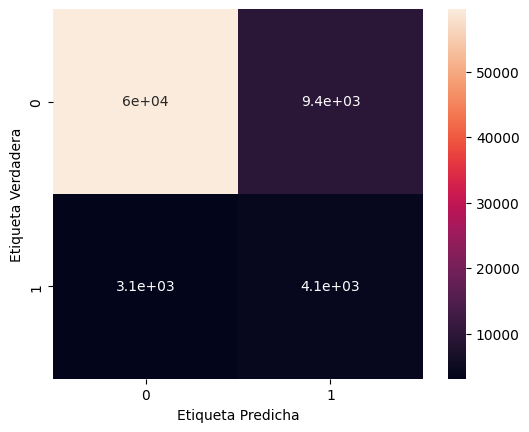

Recall: 0.5693481276005548
Precision: 0.3050457011220926
F1-score: 0.397251657231335
Fbeta-score: 0.3362659326976638
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.91     68894
         1.0       0.31      0.57      0.40      7210

    accuracy                           0.84     76104
   macro avg       0.63      0.72      0.65     76104
weighted avg       0.89      0.84      0.86     76104

---------------------------------
Using RF:
Training Accuracy: 0.9999921703726903
Testing Accuracy: 0.8212183328077368


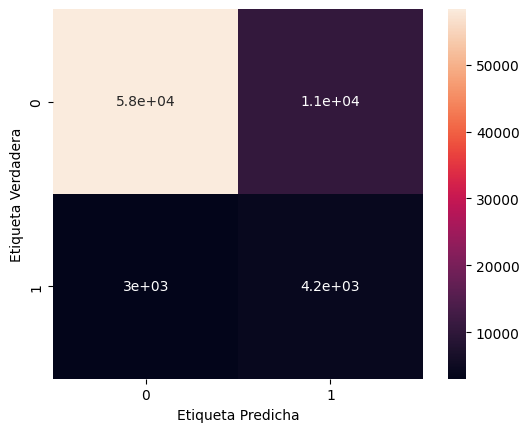

Recall: 0.578502080443828
Precision: 0.2830099063644999
F1-score: 0.38008018953891015
Fbeta-score: 0.3152111483933376
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90     68894
         1.0       0.28      0.58      0.38      7210

    accuracy                           0.82     76104
   macro avg       0.62      0.71      0.64     76104
weighted avg       0.89      0.82      0.85     76104

---------------------------------
Best Model: XGC
Best Accuracy: 0.8363160937664249


In [166]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report

best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f'Using {name}:')
    
    # Entrenar el modelo
    model.fit(x_train, y_train)
    
    # Realizar predicciones en los datos de prueba
    y_pred = model.predict(x_test)
    
    # Calcular y mostrar la precisión en los datos de entrenamiento y prueba
    train_accuracy = accuracy_score(y_train, model.predict(x_train))
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Training Accuracy: {train_accuracy}')
    print(f'Testing Accuracy: {test_accuracy}')
    
    # Verificar si el modelo actual es el mejor hasta ahora
    if test_accuracy > best_accuracy:
        best_model = name
        best_accuracy = test_accuracy
        y_predecir=y_pred
    
    # Mostrar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    # Crear un mapa de calor de la matriz de confusión
    sns.heatmap(cm, annot=True, square=True);
    
    # Agregar etiquetas a los ejes x e y
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')

    # Mostrar el gráfico
    plt.show()
    
    # Calcular y mostrar recall, precisión, F1-score y Fbeta-score
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fbeta = fbeta_score(y_test, y_pred, beta=0.5)
    print(f'Recall: {recall}')
    print(f'Precision: {precision}')
    print(f'F1-score: {f1}')
    print(f'Fbeta-score: {fbeta}')
    
    # Mostrar el informe de clasificación
    classification = classification_report(y_test, y_pred)
    print(f'Classification Report:\n{classification}')
    
    print('-' * 33)

# Mostrar el nombre del mejor modelo y su accuracy
print(f'Best Model: {best_model}')
print(f'Best Accuracy: {best_accuracy}')


In [141]:
#Distribucion de las clases
# 0 - con ataque
# 1 - sin ataque
conteo_de_clases=df.groupby('HeartDiseaseorAttack').size()
print(conteo_de_clases)

HeartDiseaseorAttack
0.0    229787
1.0     23893
dtype: int64


In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
import tensorflow as tf
pd.options.mode.chained_assignment = None 

def print_metrics(regression_type, y_test, y_pred):
  print(regression_type)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  print(f"MSE:{mse:.2f} MAE:{mse:.2f} R2:{r2:.2f} RMSE: {rmse:.2f} ")
  return mse, mae, r2, rmse
def train_models(X_train, X_test, y_train, y_test):
    best_model = None
    best_model_name = ""
    best_mse = float('inf')
    polinomial_transformer = None

    # Regresión Polinomial
    poly_features = PolynomialFeatures(degree=2)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    polinomial_regression = LinearRegression()
    polinomial_regression.fit(X_train_poly, y_train)
    y_pred_poly = polinomial_regression.predict(X_test_poly)

    mse, mae, r2, rmse = print_metrics("Polinomial Regression", y_test, y_pred_poly)
    if mse < best_mse:
        best_mse = mse
        best_model = polinomial_regression
        polinomial_transformer = poly_features
        best_model_name = "Polinomial Regression"

    # Regresión Ridge
    ridge = Ridge(alpha=0.05)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)

    mse, mae, r2, rmse = print_metrics("Ridge Regression", y_test, y_pred_ridge)
    if mse < best_mse:
        best_mse = mse
        best_model = ridge
        best_model_name = "Ridge Regression"

    # Regresión Lasso
    lasso = Lasso(alpha=0.05)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)

    mse, mae, r2, rmse = print_metrics("Lasso Regression", y_test, y_pred_lasso)
    if mse < best_mse:
        best_mse = mse
        best_model = lasso
        best_model_name = "Lasso Regression"

    return [best_model, polinomial_transformer, best_model_name]


In [161]:
#DATOS_PARA_ENTRENAMIENTO
# 0.0 - nunca tuvieron una enfermedad coronaria
# 1.0 - si tuvieron una enfermedad coronaria
# Dividir el dataset
X2 = x
y2 =y
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

In [162]:
  # Obtener mejor modelo de regresión
  best_model, polinomial_transformer, best_model_name = train_models(X2_train, X2_test, y2_train, y2_test)


Polinomial Regression
MSE:0.07 MAE:0.07 R2:0.16 RMSE: 0.27 
Ridge Regression
MSE:0.07 MAE:0.07 R2:0.13 RMSE: 0.27 
Lasso Regression
MSE:0.08 MAE:0.08 R2:0.08 RMSE: 0.28 


In [168]:
from xgboost import XGBClassifier

# Crear el clasificador
classifier = XGBClassifier(n_estimators=100)

# Entrenar el modelo usando el conjunto de entrenamiento
classifier.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [169]:
# predicción en el conjunto de prueba
y_pred = classifier.predict(x_test)


In [172]:
import pandas as pd

# Verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(x.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df


,feature,importance
0,HighBP,0.465352
7,GenHlth,0.138942
1,HighChol,0.101986
11,Sex,0.059260
3,Smoker,0.057712
10,Age,0.055415
5,PhysActivity,0.036874
4,Diabetes,0.030984
9,PhysHlth,0.015387
6,HvyAlcoholConsump,0.015013


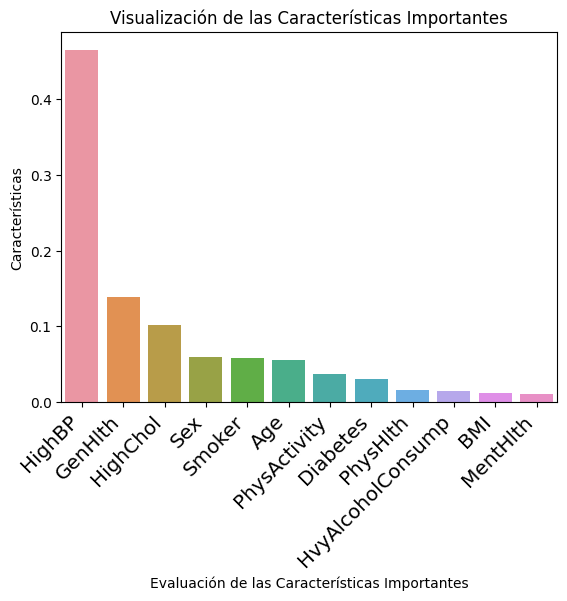

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un diagrama de barras
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

# Agregar etiquetas
plt.xlabel("Evaluación de las Características Importantes")
plt.ylabel("Características")
plt.title("Visualización de las Características Importantes")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")

# Mostrar el gráfico
plt.show()
